# Environment Setup

In [27]:
%pip install tensorflow
%pip install tensorflow numpy matplotlib
%pip tensorflow.keras



Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "tensorflow.keras"



In [28]:
import glob
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Prepossesing

Data Loading

In [30]:
def load_images_from_folder(folder):
    images = []
    labels = []
    path = r"E:\College\cl\data (cl)\Parkinson Disease\drawings\spiral"
    for filename in glob.glob(os.path.join(folder, '*/*.png')): # adjust this to match your image files
        img = load_img(filename, target_size=(200, 200)) # adjust target_size to your needs
        img = img_to_array(img)
        images.append(img)
        labels.append(os.path.basename(os.path.dirname(filename)))
    return images, labels

In [31]:
# Load images
path = r"E:\College\cl\data (cl)\Parkinson Disease\drawings\spiral"
train_images, train_labels = load_images_from_folder(os.path.join(path, 'training'))
test_images, test_labels = load_images_from_folder(os.path.join(path, 'testing'))

Convert data into an array

In [32]:
# Convert lists to numpy arrays
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to integers
train_labels = np.array([0 if label == 'healthy' else 1 for label in train_labels])
test_labels = np.array([0 if label == 'healthy' else 1 for label in test_labels])

Assign Features and Labels

In [36]:
train_images = train_images.reshape(-1, 200, 200, 3)
test_images = test_images.reshape(-1, 200, 200, 3)

# Assign features and labels
x_train = train_images
y_train = train_labels
x_test = test_images
y_test = test_labels

# Architecture

In [40]:
from keras.layers import Dropout

# Define the model
model = Sequential()

# Add first convolutional layer with max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after max pooling

# Add second convolutional layer with max pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer after max pooling

# Flatten layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer after dense layer

# Output layer
model.add(Dense(2, activation='softmax'))


In [37]:
# # Define the model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(2, activation='softmax'))

### Training

In [46]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 2 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define data generator
datagen = ImageDataGenerator(
    rotation_range=20,      
    zoom_range=0.1,         
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=True,   
    vertical_flip=False)    

datagen.fit(train_images)

model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          validation_data=(test_images, test_labels),
          epochs=10)

Epoch 1/10
3/3 [==============================] - 5s 965ms/step - loss: 13.5756 - accuracy: 0.5000 - val_loss: 1.1609 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 3s 784ms/step - loss: 1.0901 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 3s 799ms/step - loss: 0.7372 - accuracy: 0.5000 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 3s 794ms/step - loss: 0.7697 - accuracy: 0.5556 - val_loss: 0.7101 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.7552 - accuracy: 0.4444 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.7025 - accuracy: 0.5000 - val_loss: 0.7128 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.7387 - accuracy: 0.5000 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 8/10
3/3 [============

Plot Training Result

Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 0.6961 - accuracy: 0.4583 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 3s 916ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 3s 872ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 3s 877ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 3s 883ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 3s 862ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

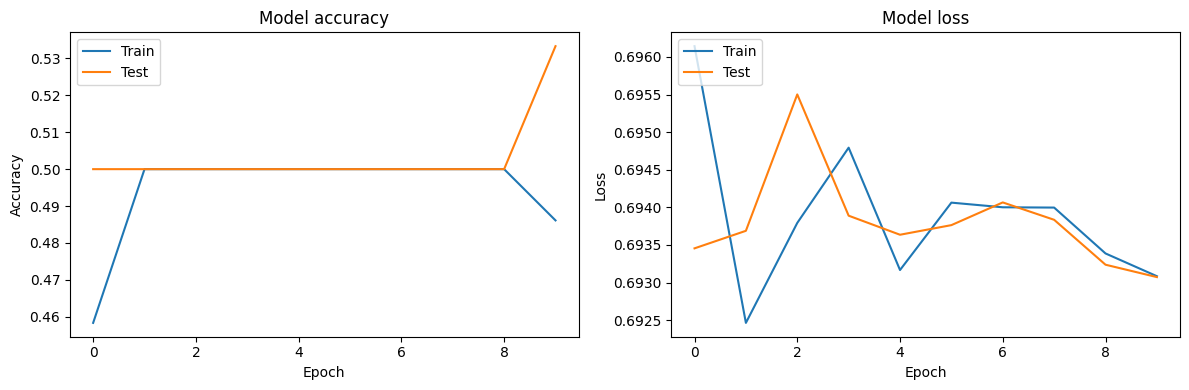

In [47]:
import matplotlib.pyplot as plt

# Fit the model and save the history
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(test_images, test_labels),
                    epochs=10)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


# Evaluation

In [48]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 1s 533ms/step - loss: 0.6931 - accuracy: 0.5333
Test Loss: 0.6930729150772095
Test Accuracy: 0.5333333611488342
